# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Цель исследования:**
1. Изучить, как быстро продавались квартиры.
2. Определить какие факторы больше всего влияют на общую (полную) стоимость объекта.
3. Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
4. Вычислить среднюю цену каждого километра удаления квартиры от центра Санкт-Петербурга

**Ход исследования**

Данные о недвижимости я получу из файла '/datasets/real_estate_data.csv'. О качестве данных ничего неизвестно, поэтому прежде чем приступать к целям исследования, понадобится обзор данных.

Данные будут проверены на ошибки, дубликаты и выбросы. Я поищу возможности исправить все ошибки данных, при этом избежав серьёзного искажения конечного результата. Далее будут созданы необходимые для анализа столбцы и будет проведён исследовательский анализ данных.

Таким образом, моё исследование будет состоять из следующих этапов:
1. Обзор данных
2. Предобработка данных
3. Рассчёты и добавление результатов в таблицу
4. Исследоватльский анализ
5. Написание общего вывода

## Знакомство с данными 

**Познакомимся с первыми строками таблицы**

In [1]:
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Получим общие сведения**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Построим общую гистограмму для всех числовых столбцов таблицы**

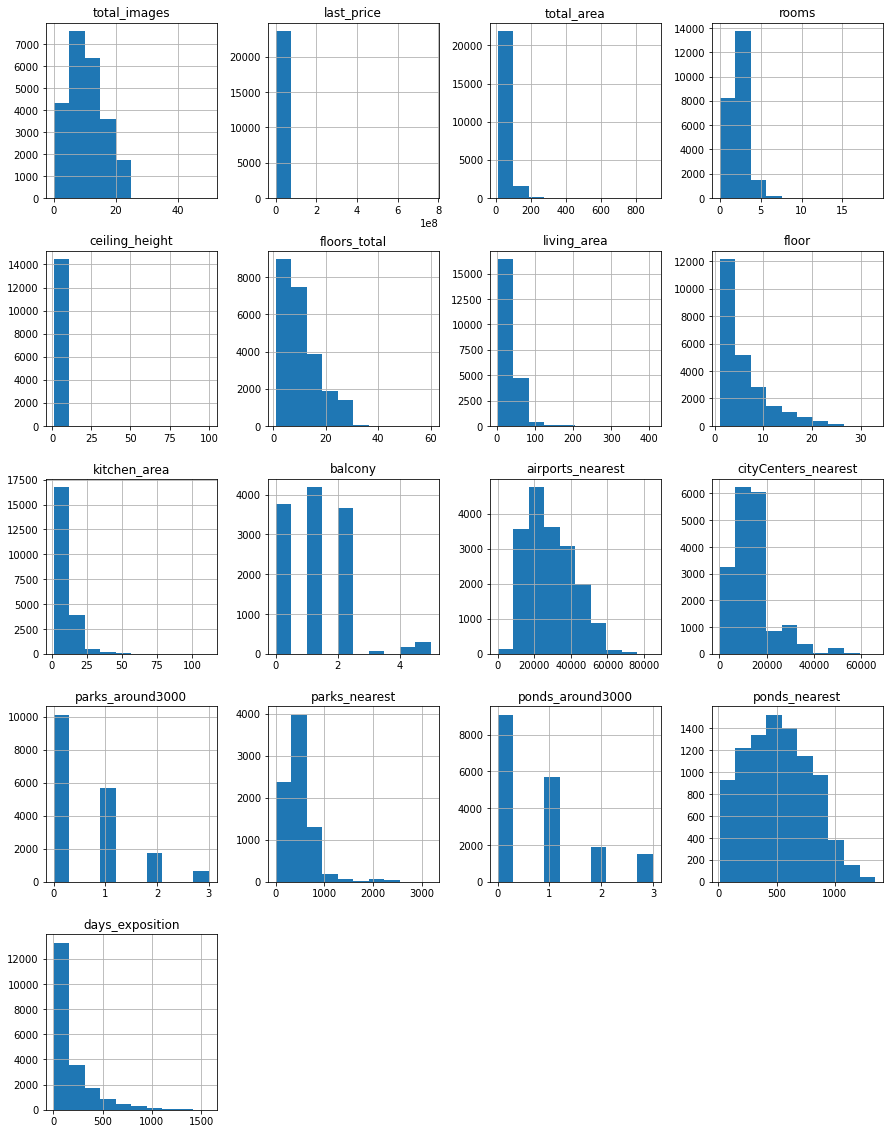

In [3]:
df.hist(figsize=(15, 20));

**Выше представлена основная информация о данных, включённых в таблицу. Всего в таблице 23699 строк и 22 колонки. Во многих колонках наблюдаются пропущенные значения. Также в ряде колонок (ceiling_height, kitchen_area, days_exposition, last_price, total_area, living_area и некоторых других) наблюдается неравномерное распределение записей: основной массив записей находится в небольшом диапазоне, а единичные записи довольно сильно из него выбиваются.**

## Предобработка данных

### Обработка пропусков

**Выведим количество пропущенных значений для каждого столбца**

In [4]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**На данный момент пропуски наблюдаются в ячейках:**
- ceiling_height, 
- floors_total,
- living_area,
- is_apartment,
- kitchen_area,
- balcony,
- locality_name,
- airports_nearest,
- cityCenters_nearest,
- parks_around3000,
- parks_nearest,
- ponds_around3000,
- ponds_nearest,
- days_exposition.

**Проанализируем каждый из этих столбцов и заполним пропуски, где это возможно.**

**Обратимся к столбцу "ceiling_height". На данный момент в нём наблюдается три типа отклонений: слишком маленькие значения, слишком большие и отсутствующие. Так как высота потолков зачастую довольно слабо варьируется, заполним все эти значения медианой. В качестве слишком малых примем значения ниже 2.2 метров, в качестве слишком больших - больше 6 метров. Так как в данных собрана информация именно о продаже квартир, мы не рассматриваем возможность появления в выборке складских помещений, для которых характерна высота потолков до 18 метров. Сначала присвоим значениям-выбросам Nan, после заменим все Nan на медиану.**

In [5]:
df['ceiling_height'].isna().sum()

9195

In [6]:
df['ceiling_height'] = df['ceiling_height'].where(df['ceiling_height'] <= 6, None)
df['ceiling_height'] = df['ceiling_height'].where(df['ceiling_height'] >= 2.2, None)

In [7]:
df['ceiling_height'].isna().sum()

9238

In [8]:
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace=True)
df['ceiling_height'].isna().sum()

0

**Итого мы избавились от 43 экстремальных значений и заменили все пропуски на медиану**

**Обратимся к столбцу "floors_total". В нём небольшое количество пропусков: всего 86. Количество этажей - довольно ограниченная величина, поэтому заполним её медианой, а там, где этаж квартиры больше медианы, присвоим значение этажа квартиры + 1.**

In [9]:
floors_median = df['floors_total'].median()
df.loc[df['floor'] <= floors_median, 'floors_total'] = df.loc[
    df['floor'] <= floors_median, 'floors_total'].fillna(floors_median)
df.loc[(df['floor'] > floors_median) & (df['floors_total'].isna()), 'floors_total'] = df.loc[
    (df['floor'] > floors_median) & (df['floors_total'].isna()), 'floor'] + 1
df['floors_total'].isna().sum()

0

**Обратимся к столбцам "living_area" и "kitchen_area". Проверим, существует ли аномалия, когда сумма площадей "living_area" и "kitchen_area" больше "total_area"**

In [10]:
len(df.query('living_area + kitchen_area > total_area'))

64

**Обнаружено 64 подобных значения. Постараемся рассчитать медианную долю, которую занимает living_area и kitchen_area для квартир с различным количеством комнат. Проверим есть ли квартиры, где количество комнат равно 0.**

In [11]:
display(len(df.query('rooms == 0')))
len(df.query('rooms == 0 and studio == True'))

197

138

**Таких квартир 197 при этом подавляющее большинство из них помечены как студии (138). Квартиры совсем без комнат быть не может, поэтому заменим 0 на 1.**

In [12]:
df['rooms'] = df['rooms'].replace(0, 1)
len(df.query('rooms == 0'))

0

In [13]:
# Считаем коэффицент для площади кухни и жилой площади
pivot_total = df.pivot_table(index='rooms', values='total_area', aggfunc='median')
pivot_living = df.pivot_table(index='rooms', values='living_area', aggfunc='median')
pivot_kitchen = df.pivot_table(index='rooms', values='kitchen_area', aggfunc='median')
living_coef = pivot_living['living_area'] / pivot_total['total_area']
kitchen_coef = pivot_kitchen['kitchen_area'] / pivot_total['total_area']
# Заменяем отсутствующие значения на произведение total_area на соответствующие коэффиценты
df.loc[df['living_area'].isna(), 'living_area'] = df[df['living_area'].isna()].apply(
    lambda x: living_coef[x['rooms']] * x['total_area'], axis=1
)
df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = df[df['kitchen_area'].isna()].apply(
    lambda x: kitchen_coef[x['rooms']] * x['total_area'], axis=1
)
# Проверяем появилась ли аномалия, когда сумма площадей "living_area" и "kitchen_area" больше "total_area".
# Если появилась, устраняем, отнимая от total_area living_area.
display(len(df.query('living_area + kitchen_area > total_area')))
df.loc[(df['kitchen_area'] + df['living_area'] > df['total_area']), 'kitchen_area'] = df.loc[
    (df['kitchen_area'] + df['living_area'] > df['total_area'])
].apply(
    lambda x: x['total_area'] - x['living_area'], axis=1
)
display(len(df.loc[df['living_area'].isna()]))
display(len(df.loc[df['kitchen_area'].isna()]))
len(df.query('living_area + kitchen_area > total_area'))


156

0

0

0

**Заменили пропуски в столбцах living_area и kitchen_area на произведение total_area на соответствующие коэффиценты. Обработали аномалии.**

**Обратимся к столбцам "is_apartment" и "balcony". Это столбцы с бинарными значениями. В столбце "is_apartment" критически много пропусков: 20924, в столбце "balcony" количество пропусков также весьма велико. Можно предположить, что в квартирах, где не описан параметр "balcony", балкон отсутствует, а квартиры, с пропущенным параметром "is_apartment" не являются аппартаментами. Исходя из этого, заполним пропуски в этих столбцах значением 0.**

In [14]:
df['is_apartment'].fillna(0, inplace=True)
df['balcony'].fillna(0, inplace=True)
display(df['is_apartment'].isna().sum())
df['balcony'].isna().sum()

0

0

**Столбцы "days_exposition", "locality_name" содержат критически важные для нас данные о длительности публикации объявления. Отсутствие данных в них может объясняться различными причинами: от технического сбоя, до того, что на момент выгрузки объявление ещё не снято с продажи. Для заполнения отсутствующих значений сложно придумать какой-либо логичный алгоритм, так как слишком много факторов может влиять на время снятия объявления с публикации, а название места также тяжело предсказать. Поэтому мы удалим строки, в которых отсутствуют эти данные.**

In [15]:
df = df.dropna(subset=['days_exposition', 'locality_name'])
display(df['days_exposition'].isna().sum())
df['locality_name'].isna().sum()

0

0

**Столбца с картографическими данными мы не сможем заполнить корректно, избежав при этом существенных искажений. Поэтому мы оставим пропуски в столбцах:**
- airports_nearest,
- cityCenters_nearest,
- parks_around3000,
- parks_nearest,
- ponds_around3000,
- ponds_nearest.

**Возможные причины, по которым отсутствует часть данных, добавляемых пользователями:**
- пункты не являются или не являлись обязательными,
- некорректно работает валидация данных на стороне фронтэнда или бэкэнда,
- пользователи не понимают значение каких-то столбцов, поэтому оставляют их незаполненными (например, чем отличаются аппартаменты от квартиры).

**Возможные причины, по которым отсутствует часть картаграфических данных:**
- некорректно работают алгоритмы автоматического заполнения данных. Например не обрабатываются какие-то кейсы и вместо значения (наименование/расстояние/True/False) функция возвращает None

### Корректировка типов данных

**Преобразуем данные в столбцах 'floors_total', 'balcony' и 'days_exposition' в тип int (эти данные могут быть только целыми), в столбце 'is_apartment' - в тип bool (столбец содержит только True/False значения), в столбце 'first_day_exposition' в тип datetime. Это позволит нам более комфортно работать с данными на этапе анализа.**

In [16]:
df = df.astype({
    'floors_total': 'int',
    'is_apartment': 'bool',
    'balcony': 'int',
    'days_exposition': 'int'
})
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20470 entries, 1 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20470 non-null  int64         
 1   last_price            20470 non-null  float64       
 2   total_area            20470 non-null  float64       
 3   first_day_exposition  20470 non-null  datetime64[ns]
 4   rooms                 20470 non-null  int64         
 5   ceiling_height        20470 non-null  float64       
 6   floors_total          20470 non-null  int64         
 7   living_area           20470 non-null  float64       
 8   floor                 20470 non-null  int64         
 9   is_apartment          20470 non-null  bool          
 10  studio                20470 non-null  bool          
 11  open_plan             20470 non-null  bool          
 12  kitchen_area          20470 non-null  float64       
 13  balcony         

### Устранение неявных дубликатов

**Проверим, присутствуют ли в выборке явные дубликаты.**

In [17]:
df.duplicated().sum()

0

**Явные дубликаты не обнаружены**

**Большая часть неявных дубликатов связана с различными вариантами написания характеристик населённых пунктов, например, "поселок" и "посёлок". Удалим всё, кроме непосредственно названий мест.**

In [18]:
print(len(df['locality_name'].unique()))
replace_list = [
    'деревня ', 'поселок ', 'посёлок ',
    'посёлок городского типа ', 'городского типа ', 'коттеджный посёлок ',
    'коттеджный поселок ', 'село ', 'городской ', 'коттеджный ', 'садовое товарищество ',
    'станции ', 'садоводческое некоммерческое товарищество ', 'при железнодорожной '
]
df['locality_name'] = df['locality_name'].replace(replace_list, '', regex=True)
len(df['locality_name'].unique())

330


281

**Проанализируем столбцы на предмет аномальных значений. Выше мы уже скорректировали некоторые аномальные значения в столбцах, описывающих высоту потолков и жилые и кухонные площади. Однако у нас есть ещё один критичный столбец для анализа: стоимость квартир. Посмотри на наличие в нём выбросов с помощью диаграммы размаха**

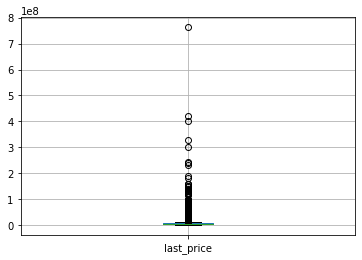

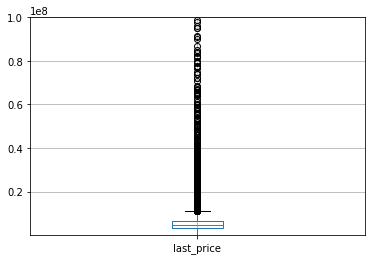

In [19]:
import matplotlib.pyplot as plt
df.boxplot(column='last_price')
plt.show()
plt.ylim(70000, 100000000)
df.boxplot(column='last_price')
plt.show()

**Как мы можем заметить, на данных диаграммах присутствует определённое количество аномально больших цен. Эти цены вполне могут быть реальными, однако их экстремальные значения могут негативно сказаться на результатах последующего анализа, исказив данные. Удалим аномальные значения цены, которое меньше 40 000 руб или больше 50 000 000 руб.**

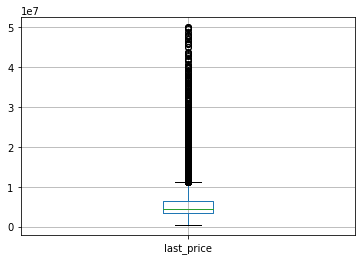

In [20]:
df = df[(df.last_price > 40000) & (df.last_price < 50000000)]
df.boxplot(column='last_price')
plt.show()

**В результате этого этапа мы заменили пропуски в пользовательских данных, часть данных с пропусками в столбцах days_exposition и locality_name была удалена, так как в них содержится относительно несущественное количество данных, которые крайне сложно корректно заменить. Были скорректированы данные в столбцах living_area и kitchen_area, которые в сумме превышали значение столбца total_area, также были заменены аномальные значения в столбце ceiling_height, и исключены столбцы с аномально высокой или низкой стоимостью квартир. Явных дубликатов не было обнаружено. Неявные дубликаты в столбце locality_name исключены, количество уникальных строк сократилось с 330 до 281.**

## Посчитайте и добавьте в таблицу новые столбцы

**Добавим в таблицу следующие столбцы:**
- 'sq_metre_price' - цена одного квадратного метра
- 'day_exposition' - день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- 'month_exposition' - месяц публикации объявления
- 'year_exposition' - год публикации объявления
- 'floor_category' - тип этажа квартиры (значения — «первый», «последний», «другой»)
- 'cityCenters_km' -  расстояние в км до центра города

In [21]:
df['sq_metre_price'] = df['last_price'] / df['total_area']
df['day_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).dayofweek
df['month_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).year
def categorize_floor(line):
    if line['floor'] == 1:
        return 'первый'
    elif line['floor'] == line['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_category'] = df.apply(categorize_floor, axis=1)
df['cityCenters_km'] = df['cityCenters_nearest'] // 1000
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_metre_price,day_exposition,month_exposition,year_exposition,floor_category,cityCenters_km
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0.0,NaN,81,82920.792079,1,12,2018,первый,18.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2.0,574.0,558,92785.714286,3,8,2015,другой,13.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121,100000.000000,1,6,2018,другой,8.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,NaN,NaN,55,95065.789474,0,9,2018,другой,NaN
6,6,3700000.0,37.3,2017-11-02,1,2.65,26,10.6,6,False,...,NaN,0.0,NaN,155,99195.710456,3,11,2017,другой,19.0


## Проведите исследовательский анализ данных

### Изучим отдельные ячейки таблицы

#### Общая площадь

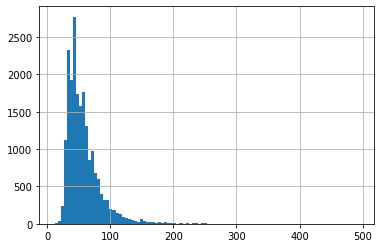

In [22]:
df['total_area'].hist(bins=100);

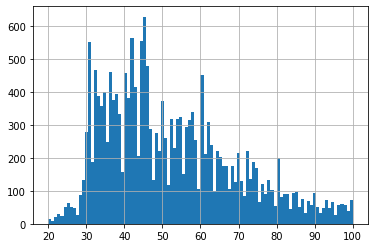

In [23]:
df['total_area'].hist(bins=100, range=(20, 100));

**Исходя из гистограммы подавляющее большинство квартир имеют общую площадь от 30 до 100 метров. Лишь единицы квартир находятся в диапазоне < 20 / > 100. Есть квартира с рекордной площадью ~ 500 метров квадратных. Самое частое значение - ~45 м.**

#### Жилая площадь

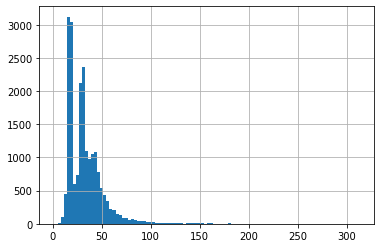

In [24]:
df['living_area'].hist(bins=100);

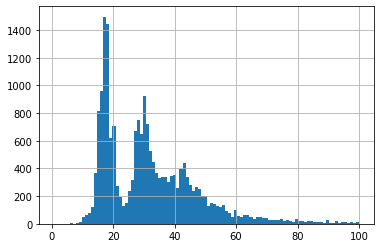

In [25]:
df['living_area'].hist(bins=100, range=(1, 100));

**Исходя из гистограммы подавляющее большинство квартир имеют жилую площадь от 15 до 60 метров. Лишь единицы квартир находятся в диапазоне < 15 / > 60. Есть квартира с рекордной жилой площадью ~ 400 метров квадратных. Самое частое значение - ~18 м.**

#### Площадь кухни

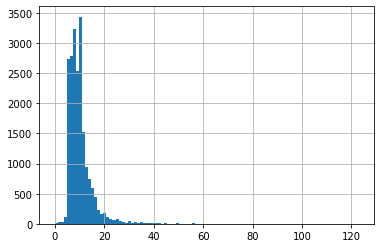

In [26]:
df['kitchen_area'].hist(bins=100);

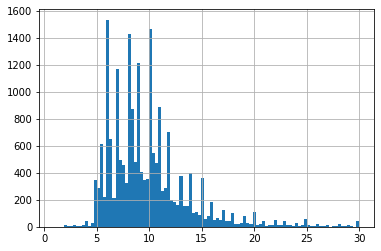

In [27]:
df['kitchen_area'].hist(bins=100, range=(1, 30));

**Исходя из гистограммы подавляющее большинство квартир имеют площадь кухни от 5 до 15 метров. Лишь единицы квартир находятся в диапазоне < 5 / > 15. Есть квартира с рекордной площадью кухни ~ 120 метров квадратных. Самое частое значение - ~ 6 м.**

#### Цена объекта

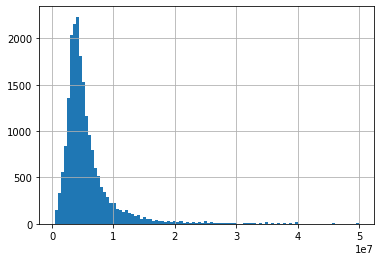

In [28]:
df['last_price'].hist(bins=100);

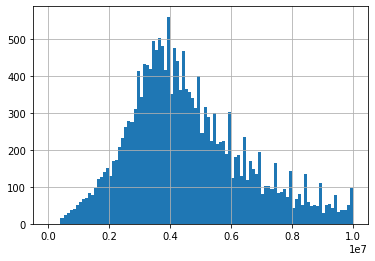

In [29]:
df['last_price'].hist(bins=100, range=(1, 10000000));

In [30]:
df['last_price'].max()

49968900.0

**Исходя из гистограммы подавляющее большинство квартир продавались за стоимось в диапазоне от 1.5 млн. руб. до 10 млн. руб. Однако на графике мы можем наблюдать и цены менее 1 млн. / более 10. Самое частое значение - ~ 4 млн. руб.**

#### Количество комнат

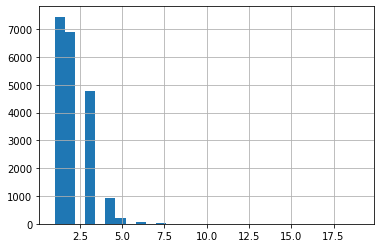

In [31]:
df['rooms'].hist(bins=30);

In [32]:
df['rooms'].max()

19

**Исходя из гистограммы больше всего квартир имеют одну комнату. На втором месте двухкомнатные квартиры, их в выборке чуть меньше 7 000, 3 место занимают трёхкомнатные квартиры. Есть также и единичные квартиры с количеством комнат до 19.**

#### Высота потолков

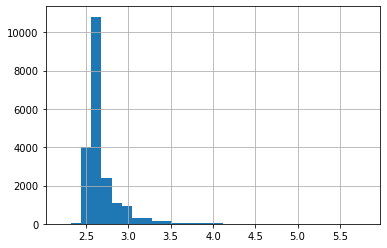

In [33]:
df['ceiling_height'].hist(bins=30);

**Подавляющее число квартир имеет высоту потолка в диапазоне от 2.4 до 2.7 м. с пиком в 2.6 м. Есть и квартиры с более высокими потолками вплоть до ~ 6 м., однако их единицы.**

#### Этаж квартиры

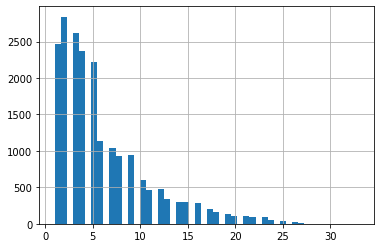

In [34]:
df['floor'].hist(bins=50);

**Наибольшее число квартир в выборке находится на 2-м этаже, далее идут квартиры на 3-м, 1-м, 4-м и 5-м этажах по убыванию числа квартир. Самый высокий этаж, на котором располагаются квартиры в выборке - 33-й.**

#### Тип этажа квартиры («первый», «последний», «другой»)

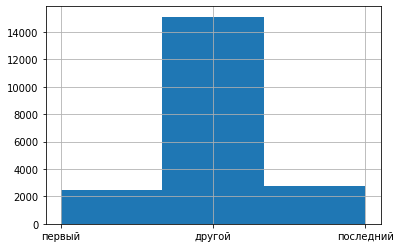

In [35]:
df['floor_category'].hist(bins=3);

In [36]:
df['floor_category'].value_counts()

другой       15108
последний     2791
первый        2463
Name: floor_category, dtype: int64

**Большая часть квартир расположена в категории этажа "другой", квартиры на первом и последнем этаже близки по количеству в выборке, однако квартир на последнем этаже всё-таки на 352 больше.**

#### Общее количество этажей в доме

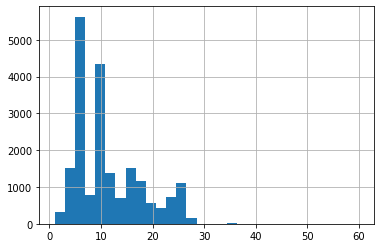

In [37]:
df['floors_total'].hist(bins=30);

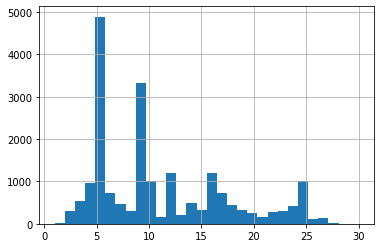

In [38]:
df['floors_total'].hist(bins=30, range=(1, 30));

**Подавляющее большинство квартир расположены в домах с 5 этажами, на втором месте - девятиэтажки, далее 12 и 16 этажей. Есть 1 кейс квартиры в 60-ти этажном доме. Основной диапазон - от 3 до 25 этажей.**

#### Расстояние до центра города в метрах

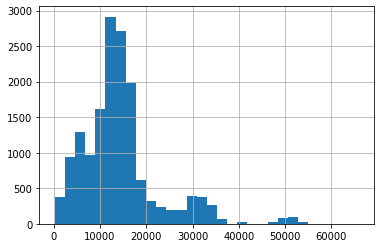

In [39]:
df['cityCenters_nearest'].hist(bins=30);

**Пик значений приходится примерно на 11 000 метров, основной разброс значений находится между примерно 1 000 и 30 000 метров.**

#### Расстояние до ближайшего аэропорта

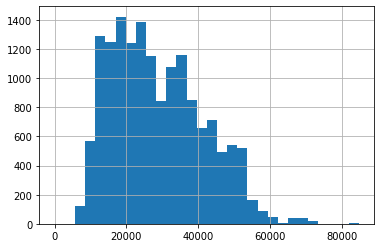

In [40]:
df['airports_nearest'].hist(bins=30);

**Пик значений приходится примерно на 19 000 м. и 22 000 м., основной разброс значений находится между примерно 10 000 и 52 000 метров.**

#### Расстояние до ближайшего парка

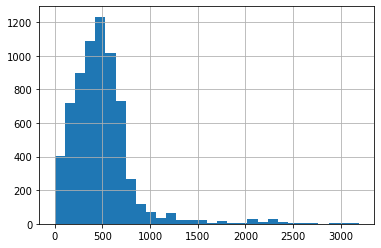

In [41]:
df['parks_nearest'].hist(bins=30);

**Пик значений приходится примерно на 500 м., основной разброс значений находится между примерно 150 и 800 метров.**

#### День публикации объявления

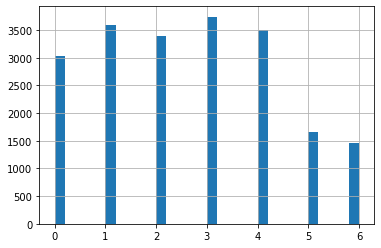

In [42]:
df['day_exposition'].hist(bins=30);

**Пик значений приходится на четверг, однако распределение по будним дням в целом скорее равномерное. Существенный спад в публикациях наблюдается в выходные дни.**

#### Месяц публикации объявления

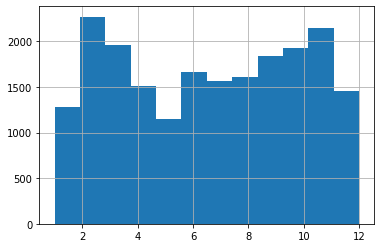

In [43]:
df['month_exposition'].hist(bins=12);

**Пик значений приходится на февраль, однако распределение по месяцам скорее равномерное. Заметные спады в публикациях наблюдается в январе, мае и декабре. Это может быть обусловлено большим количеством праздников в эти месяцы.** 

### Изучим, как быстро продавались квартиры.

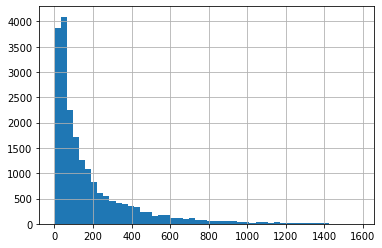

In [44]:
df['days_exposition'].hist(bins=50);

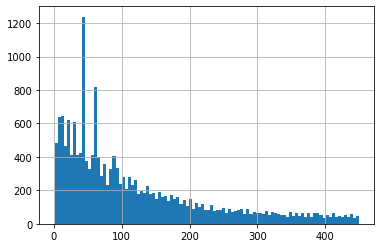

In [45]:
df['days_exposition'].hist(bins=100, range=(1, 450));

In [46]:
df['days_exposition'].describe()

count    20362.000000
mean       180.001817
std        219.211037
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Чаще всего в выборке данных встречается длительность продажи квартиры в 45 дней, это число дней также является первым квартилем. Всё, что меньше 45 дней, соответственно, можно назвать аномально быстрой скоростью продажи. Медианное значение при этом - 95, а среднее - 181. Среднее почти в 2 раза больше медианы, это можно объяснить тем, что в выборке присутствуют необычно долгие значения вплоть до 1580 дней. Межквартильный размах (значения от 45 до 230 дней) можно назвать нормальным временем продажи, а всё выше третьего квартиля (230 дней) можно считать аномально долгой продажей.**

### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

**Построим диаграммы рассеяния для каждого типа зависимостей**

0.7823573937570751

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


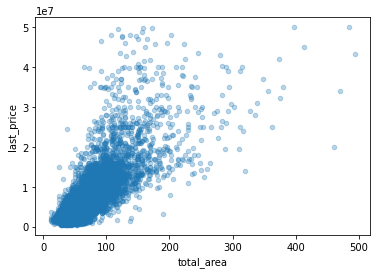

In [47]:
display(df['total_area'].corr(df['last_price']))
df.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3);

0.6914833598833038

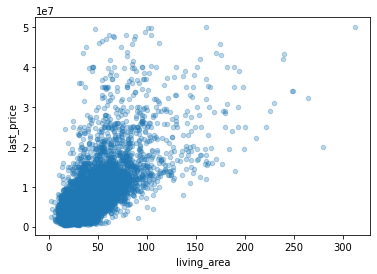

In [48]:
display(df['living_area'].corr(df['last_price']))
df.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3);

0.6076100251053053

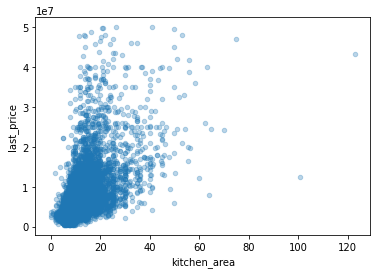

In [49]:
display(df['kitchen_area'].corr(df['last_price']))
df.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3);

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


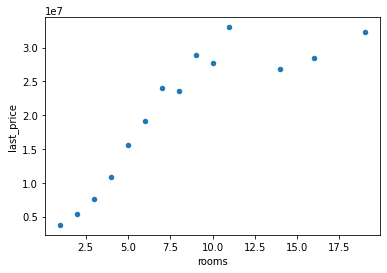

In [60]:
rooms_pivot = df.pivot_table(index='rooms', values='last_price').reset_index()
#display(rooms_pivot['rooms'].corr(rooms_pivot['last_price']))
rooms_pivot.plot(x='rooms', y='last_price', kind='scatter');

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


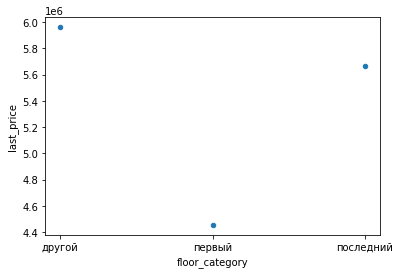

In [51]:
floor_category_pivot = df.pivot_table(index='floor_category', values='last_price').reset_index()
floor_category_pivot.plot(x='floor_category', y='last_price', kind='scatter');

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


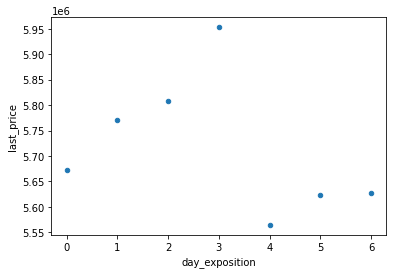

In [52]:
day_exposition_pivot = df.pivot_table(index='day_exposition', values='last_price').reset_index()
day_exposition_pivot.plot(x='day_exposition', y='last_price', kind='scatter');

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


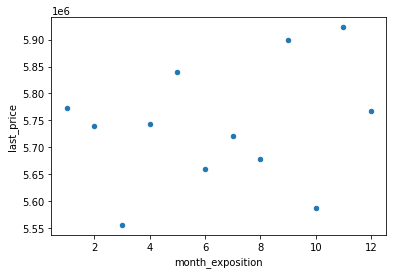

In [53]:
month_exposition_pivot = df.pivot_table(index='month_exposition', values='last_price').reset_index()
month_exposition_pivot.plot(x='month_exposition', y='last_price', kind='scatter');

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


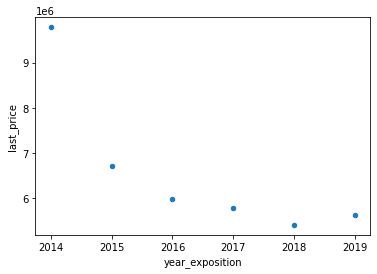

In [54]:
year_exposition_pivot = df.pivot_table(index='year_exposition', values='last_price').reset_index()
year_exposition_pivot.plot(x='year_exposition', y='last_price', kind='scatter');

**Исходя из построенных графиков, мы можем увидеть, что сильная зависимость есть между ценой и следующими параметрами: общая площадь, жилая площадь, площадь кухни, количество комнат. В случае с вышеперечисленными параметрами наблюдается прямая зависимость. Обратная зависимость наблюдается с годом продажи. Средняя стоимость квартир была выше в более ранние годы и постепенно снижалась. Ярко выраженной зависимость от дня и месяца публикации не наблюдается.**

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра

In [55]:
df.groupby('locality_name').agg({'balcony':'count', 'sq_metre_price':'mean'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,sq_metre_price
locality_name,,
Санкт-Петербург,13530,109886.352564
Мурино,551,85743.233293
Кудрово,441,94408.041602
Шушары,408,78010.167480
Всеволожск,339,68570.615292
Колпино,308,74865.364347
Пушкин,307,102074.629153
Парголово,302,89505.043917
Гатчина,268,67928.326990


**В таблице выше представлены топ 10 городов с наибольшим количеством объявлений о продаже жилья. Населённым пунктом с самой высокой стоимостью квадратного метра является Санкт-Петербург, где средняя стоимость 1 кв. м. составляет 109 886 руб. Самая низкая стоимость 1 кв. м. наблюдается в Выборге и составляет 57 084 руб.**

In [56]:
df.groupby('locality_name').agg({'balcony':'count', 'sq_metre_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,sq_metre_price
locality_name,,
Санкт-Петербург,13530,102865.353038
Мурино,551,86075.949367
Кудрово,441,94594.594595
Шушары,408,76220.394737
Всеволожск,339,65789.473684
Колпино,308,74005.089610
Пушкин,307,97938.144330
Парголово,302,91387.362637
Гатчина,268,67180.706522


### Вычислим среднюю цену каждого километра от центра города в Санкт-Петербурге.

**Посмотрим на медианное значение стоимости квартир в зависимости от удаленности от центра**

In [57]:
listing_spb = df[df['locality_name'] == 'Санкт-Петербург']
listing_spb_pivot = listing_spb.pivot_table(
    index='cityCenters_km', values='last_price', aggfunc='median'
)
listing_spb_pivot.reset_index()

,cityCenters_km,last_price
0,0.0,9900000.0
1,1.0,9970000.0
2,2.0,8860000.0
3,3.0,8000000.0
4,4.0,9400000.0
5,5.0,8500000.0
6,6.0,7300000.0
7,7.0,7000000.0
8,8.0,6220000.0
9,9.0,4900000.0


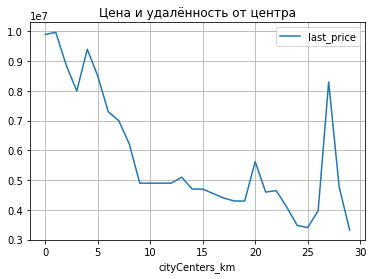

In [58]:
listing_spb_pivot.plot(grid = True, title = 'Цена и удалённость от центра');

**Как мы видим в среднем медианная стоимость квартиры снижается в зависимости от удалённости от центра. Пик наблюдается только на 27 км. Однако это может быть вызвано наличием значительного числа элитных ЖК в этом районе. Для рассчёта средней цены 1 км. удалённости от центра вычтим из медианной цены квартиры на 0 км. медианную цену на 29-м км. и поделим получившуюся цифру на количество километров.**

In [59]:
(listing_spb_pivot.loc[0] - listing_spb_pivot.loc[29]) / listing_spb_pivot.index[-1]

last_price    226724.137931
dtype: float64

**Таким образом каждый километр приближающей квартиру к центру в среднем добавляет её стоимости 226 724 руб.**

## Общий вывод

**При работе над этим проектом была выполнена предобработка данных, которая включала в себя заполнение пропусков, выявление явных и неявных дубликатов и их удаление, а также ликвидация аномальных значений данных. Был рассчитан ряд показателей, которые в дальнейшем использовались для анализа датасета (см. пункт 3). В рамках аналитической части были рассмотрены вопросы: как быстро продавались квартиры, Какие факторы больше всего влияют на общую (полную) стоимость объекта, какова средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений, какова средняя цена каждого километра удаления от центра Санкт-Петербурга.**

**В результате исследования мы пришли к следующим выводам:**

- **Чаще всего в выборке данных встречается длительность продажи квартиры в 45 дней. На встором месте 60 дней. Медианное значение при этом - 95, а среднее - 181. В целом аномально длительными можно назвать значения от 600 дней, аномально маленькими - значения до 10 дней.**

- **В результате мы можем отметить, что была обнаружена прямая связь между ценой и следующими параметрами: общая площадь, жилая площадь, площадь кухни, количество комнат. Обратная зависимость существует с годом продажи. Самые высокие цены были в самом раннем году среди всех наблюдений, в 2014. Ярко выраженной зависимость от дня и месяца публикации не наблюдается.**

- **Населённым пунктом с самой высокой стоимостью квадратного метра является Санкт-Петербург, где средняя стоимость 1 кв. м. составляет 109 886 руб. Самая низкая стоимость 1 кв. м. наблюдается в Выборге и составляет 57 084 руб.**

- **Каждый километр приближающей квартиру к центру Санкт-Петербурга в среднем добавляет её стоимости 226 724 руб.**
